In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\HP\Downloads\ML Live Flight Fare Resourses16963295320.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [5]:
data['Additional_Info'].value_counts()*100/data['Additional_Info'].count()

Additional_Info
No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: count, dtype: float64

In [6]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data[data['Route'].isnull()].index

Index([9039], dtype='int64')

In [9]:
data.drop(data[data['Route'].isnull()].index,inplace=True)
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10682 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 834.5+ KB


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data['j_date']=pd.to_datetime(data['Date_of_Journey']).dt.day
data['j_mon']=pd.to_datetime(data['Date_of_Journey']).dt.month

In [13]:
data['d_hr']=pd.to_datetime(data['Dep_Time']).dt.hour.astype('int64')
data['d_min']=pd.to_datetime(data['Dep_Time']).dt.minute.astype('int64')

In [14]:
data['a_hr']=pd.to_datetime(data['Arrival_Time']).dt.hour.astype('int64')
data['a_min']=pd.to_datetime(data['Arrival_Time']).dt.minute.astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10682 non-null  int64 
 9   j_date           10682 non-null  int32 
 10  j_mon            10682 non-null  int32 
 11  d_hr             10682 non-null  int64 
 12  d_min            10682 non-null  int64 
 13  a_hr             10682 non-null  int64 
 14  a_min            10682 non-null  int64 
dtypes: int32(2), int64(5), object(8)
memory usage: 1.2+ MB


In [16]:
lis=data['Duration']
new_lis=[]
for i in lis:
    if len(i.split(' '))==1:
        if 'm' in i:
            i='0h '+i
        else:
            i=i+' 0m'
    new_lis.append(i)
data['Duration']=new_lis

In [17]:
data['dur_h']=data['Duration'].str.split(' ').str[0].replace('h','',regex=True).astype('int64')
data['dur_min']=data['Duration'].str.split(' ').str[1].replace('m','',regex=True).astype('int64')


In [18]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [19]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_h,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [20]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
data['Total_Stops'].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],[0,2,1,3,4],inplace=True)

In [22]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_h,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [23]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
enc=LabelEncoder()

In [26]:
data[['Airline','Source','Destination']]=data[['Airline','Source','Destination']].apply(enc.fit_transform)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Airline      10682 non-null  int32
 1   Source       10682 non-null  int32
 2   Destination  10682 non-null  int32
 3   Total_Stops  10682 non-null  int64
 4   Price        10682 non-null  int64
 5   j_date       10682 non-null  int32
 6   j_mon        10682 non-null  int32
 7   d_hr         10682 non-null  int64
 8   d_min        10682 non-null  int64
 9   a_hr         10682 non-null  int64
 10  a_min        10682 non-null  int64
 11  dur_h        10682 non-null  int64
 12  dur_min      10682 non-null  int64
dtypes: int32(5), int64(8)
memory usage: 959.7 KB


In [28]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_h,dur_min
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40


In [29]:
data.to_excel(r'C:\Users\HP\Desktop\new folder\live project\ml2.xlsx',index=False)

In [30]:
data=pd.read_excel(r'C:\Users\HP\Desktop\new folder\live project\ml2.xlsx')

In [31]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_h,dur_min
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,0,4107,9,4,19,55,22,25,2,30
10678,1,3,0,0,4145,27,4,20,45,23,20,2,35
10679,4,0,2,0,7229,27,4,8,20,11,20,3,0
10680,10,0,5,0,12648,1,3,11,30,14,10,2,40


In [32]:
x=data.drop('Price',axis=1)
y=data['Price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
model.score(x_train,y_train)

0.44001910677071876

In [39]:
model.score(x_test,y_test)

0.4218927196323802

In [40]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [41]:
list=[LinearRegression,RandomForestRegressor,DecisionTreeRegressor,SVR,KNeighborsRegressor]

In [42]:
for i in list:
    k=KFold(n_splits=5)
    print(i)
    model=i()
    print(cross_val_score(model,x,y,cv=k).mean())
    

<class 'sklearn.linear_model._base.LinearRegression'>
0.4352856259635294
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.8073785428496363
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
0.6913029082084137
<class 'sklearn.svm._classes.SVR'>
0.006243706082704659
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
0.6153886015695804


In [43]:
train=[]
test=[]
for i in range(0,100,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    model=RandomForestRegressor(random_state=10)
    model.fit(x_train,y_train)
    train.append(model.score(x_train,y_train))
    test.append(model.score(x_test,y_test))

In [44]:
model=RandomForestRegressor(random_state=10)

In [45]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [46]:
model.score(x_train,y_train)


0.9538845788614569

In [47]:
model.score(x_test,y_test)

0.7244940553957067

In [48]:
train

[0.9528974336557173,
 0.9526647626124116,
 0.9547138087478061,
 0.9533133779603656,
 0.9521253746031185,
 0.9515752987983181,
 0.954337831893185,
 0.9531204181839845,
 0.9500884557268278,
 0.9538845788614569]

In [49]:
test

[0.7823379668573979,
 0.8034204573281043,
 0.7613963863142038,
 0.7580687741432548,
 0.8161836739166467,
 0.7910250994279008,
 0.7495472381774875,
 0.80344825693783,
 0.8155645734260755,
 0.7244940553957067]

In [50]:
test.index(max(test))

4

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=40)
model=RandomForestRegressor(random_state=10)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9521253746031185
0.8161836739166467


In [52]:
dic={'n_estimators':[100,110,120],'max_depth':[2,3,4],'random_state':[10,15,12]}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
random=RandomizedSearchCV(RandomForestRegressor(),param_distributions=dic,n_iter=30,cv=k,verbose=2)

In [55]:
random.fit(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .....max_depth=2, n_estimators=100, random_state=10; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=10; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=10; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=10; total time=   0.7s
[CV] END .....max_depth=2, n_estimators=100, random_state=10; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=15; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=15; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=15; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=15; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=15; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, random_state=12; total time=   0.6s
[CV] END .....max_depth=2, n_estimators=100, ra

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'n_estimators': [100, 110, 120],
                                        'random_state': [10, 15, 12]},
                   verbose=2)

In [56]:
random.best_params_

{'random_state': 15, 'n_estimators': 100, 'max_depth': 4}

In [57]:
model=RandomForestRegressor(random_state=15,n_estimators=100,max_depth=4)

In [58]:
model.fit(x,y)

RandomForestRegressor(max_depth=4, random_state=15)

In [59]:
model.score(x,y)

0.6454640417033554

In [60]:
pd.Series(model.feature_importances_,index=x.columns)

Airline        0.114447
Source         0.000540
Destination    0.052149
Total_Stops    0.063774
j_date         0.093777
j_mon          0.019120
d_hr           0.000416
d_min          0.000801
a_hr           0.000288
a_min          0.000199
dur_h          0.653789
dur_min        0.000701
dtype: float64

In [61]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

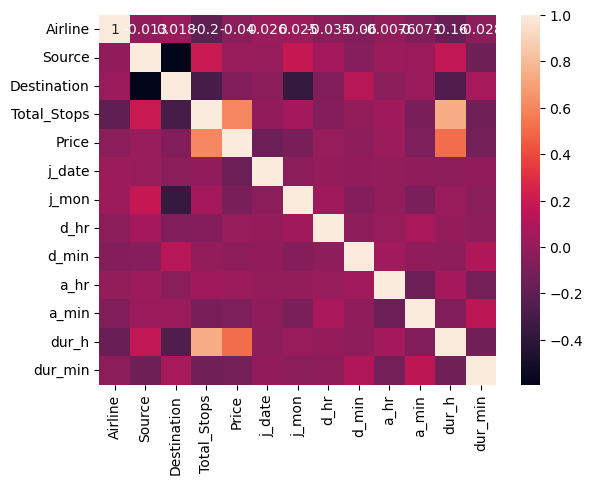

In [62]:
sns.heatmap(data.corr(),annot=True);

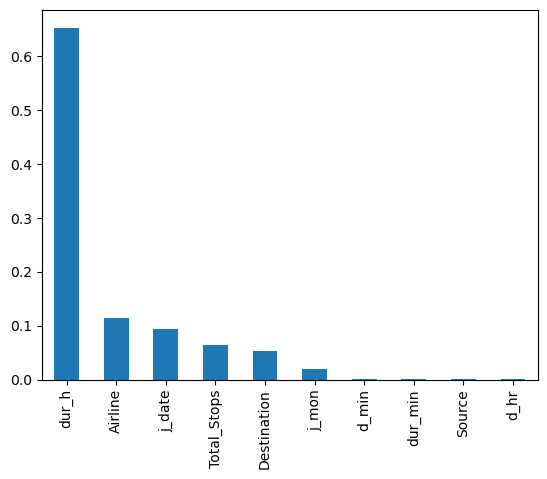

In [63]:
pd.Series(model.feature_importances_,index=x.columns).nlargest(10).plot(kind='bar');

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [68]:
mean_absolute_error(y_train,model.predict(x_train))

1881.7662504376

In [73]:
(mean_squared_error(y_train,model.predict(x_train)))*(1/2)

3681344.9847513237

In [76]:
r2_score(y_train,model.predict(x_train))

0.6493059659542488